# Introdução

Projeto desenvolvido como forma de avaliação do Nanodegree de Fundamentos de Data Science I

Autor: **Anderson Pereira de Souza**

Este projeto tem por intuito analisar os dados da tragédia do Titanic. Na análise aqui realizada, foi utilizado um conjunto com dados demográficos e informações de 891 dos 2.224 passageiros e tripulantes a bordo do Titanic.

Para nortear a análise destes dados, algumas perguntas foram definidas:  
* Quantas pessoas sobreviveram e quantas não sobreviveram?
* Qual o número de homens e mulheres que sobreviveram?
* Pessoas mais jovens foram as que mais sobreviveram?
* Pessoas da 1ª Classe foram a maioria entre os sobreviventes?
* Pessoas sozinhas foram as que mais sobreviveram?
* Pessoas acompanhadas foram as que mais morreram?

### Importar as bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', palette='pastel')

### Realizar a leitura do arquivo com os dados

In [2]:
df = pd.read_csv('titanic-data-6.csv')

# Definição dos dados
Antes de iniciar a avaliação dos dados, é importante ter noção do que representa cada coluna do DataFrame. Abaixo segue tabela explicativa.

| Variable 	| Definition                                 	| Key                                            	|
|----------	|--------------------------------------------	|------------------------------------------------	|
| survival 	| Survival                                   	| 0 = No, 1 = Yes                                	|
| pclass   	| Ticket class                               	| 1 = 1st, 2 = 2nd, 3 = 3rd                      	|
| sex      	| Sex                                        	|                                                	|
| Age      	| Age in years                               	|                                                	|
| sibsp    	| # of siblings / spouses aboard the Titanic 	|                                                	|
| parch    	| # of parents / children aboard the Titanic 	|                                                	|
| ticket   	| Ticket number                              	|                                                	|
| fare     	| Passenger fare                             	|                                                	|
| cabin    	| Cabin number                               	|                                                	|
| embarked 	| Port of Embarkation                        	| C = Cherbourg, Q = Queenstown, S = Southampton 	|

[Fonte](https://www.kaggle.com/c/titanic)

### Observações sobre os dados

pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

age: Age is fractional if less than 1.  
If the age is estimated, is it in the form of xx.5  

sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  
[Fonte](https://www.kaggle.com/c/titanic)

### Nome das colunas e tipo de dados

In [3]:
df.columns.values #Imprime os nomes das colunas do dataframe

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [4]:
df.info() #Imprime as informações a respeito das colunas do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


### Amostra dos dados

In [5]:
df.head() #Consulta os 5 primeiros dados do dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Breve detalhamento das colunas

In [6]:
df.describe() #Descreve as colunas demonstrando algumas informações sobre os valores

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Limpeza dos dados

Primeiramente deve-se verificar a quantidade de dados nulos, para então ajustar os dados

In [7]:
df.isna().sum() #somatória do número de dados que são nulos

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Foi identificado que as colunas que possuem dados nulos são 'Age', 'Cabin' e 'Enbarked'

##### Verificar a quantidade de dados duplicados

In [8]:
df.duplicated().sum() #Verificar quantidade de dados duplicados

0

Não há dados duplicados neste dataframe

#### Prosseguindo com a limpeza dos dados

In [9]:
df.Age.median() #Verifica a mediana do Dataframe

28.0

In [10]:
df.Age.fillna(df.Age.median(), inplace=True) #A idade foi preenchida com a mediana de todo o conjunto de dados

In [11]:
df.Cabin.fillna('None', inplace=True) #A cabine foi preenchida com None

In [12]:
df.Embarked.fillna('None',inplace=True) #Local de embarcação foi preenchida com None

## Funções

Função para gerar gráfico de barras  

In [13]:
def gerar_grafico_barras(dados: pd.Series, titulo="", yLabel="", xLabel="", horizontal_orientation=False, labels=""):
    '''Função para gerar gráfico de barras
    INPUT:
        dados = Dados para serem mostrados no gráfico. Obrigatóriamente devem ser do tipo pd.Series
        labels = Nome para ser utilizado como tick_label, fica abaixo de cada variavel. Caso não seja informado, pega o label dos dados.
        titulo = Título do gráfico.
        yLabel = Nome do label que fica a esquerda do gráfico.
        xLabel = Nome do label que fica abaixo do gráfico.
        horizontal_orientation = Indica se o gráfico deve ser gerado na Vertical(Padrão) ou Horizontal.
    OUTPUT:
        Gráfico de barras utilizando os dados informados.
    '''
    locations = np.arange(dados.index.to_series().count()) #Pega a quantidade de variaveis pela quantidade de index
    heights = dados #altura do gráfico são os dados passados na chamada da função
    if(not labels): #Se os labels não foram informados
        labels = dados.index.to_series() #labels serão os index dos dados
    plt.figure(figsize=(10,5)) #configura o tamanho do gráfico
    if(horizontal_orientation): #Verifica se o gráfico deve ser gerado na horizontal
        plt.barh(locations, heights, tick_label=labels)
    else: #gráfico gerado na vertical
        plt.bar(locations, heights, tick_label=labels)
    plt.title(titulo) #Define o título do gráfico 
    plt.ylabel(yLabel) #Define o texto que fica na esquerda do gráfico
    plt.xlabel(xLabel) #Define o texto que fica abaixo do gráfico

# Perguntas
---

### Quantas pessoas sobreviveram e quantas não sobreviveram?

Para responder a esta pergunta, primeiramente é necessário separar o dataframe em 2, um com os sobreviventes e outro com os que não sobreviveram

#### Filtrar dataframe apenas dos que sobreviveram e que não sobreviveram

In [14]:
df_survived = df.query("Survived == 1") #Dataframe com os sobreviventes
df_died = df.query("Survived == 0") #Dataframe com os falecidos

In [15]:
print('Total de passageiros: ' + str(df.PassengerId.count()) + 
      ". Sobreviventes: " + str(df_survived.PassengerId.count()) + 
      ". Mortos: " + str(df_died.PassengerId.count()))

Total de passageiros: 891. Sobreviventes: 342. Mortos: 549


Com os dados filtrados, podemos montar um gráfico que demonstra lado a lado o número obtido

In [16]:
se_survivals = pd.Series(df['Survived'].groupby(df['Survived']).count()) #Agrupar os dados da coluna Survived em um Series para gerar o gráfico abaixo

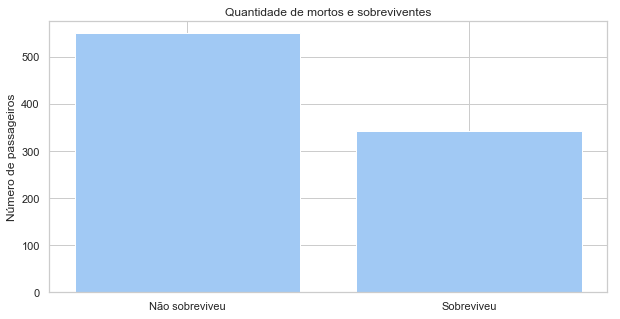

In [17]:
gerar_grafico_barras(dados=se_survivals,
                       titulo='Quantidade de mortos e sobreviventes',
                       yLabel='Número de passageiros',
                       labels=['Não sobreviveu', 'Sobreviveu'])

Neste conjunto de dados havia o total de 891 pessoas, dentre essas, 549 não sobreviveram e 342 sobreviveram.

### Qual o número de homens e mulheres que sobreviveram?

Para responder a esta pergunta, foi agrupado a quantidade de homens e mulheres em uma Series, para gerar os gráficos e apresentar os resultados

In [18]:
se_gender_survived = pd.Series(df_survived['Sex'].groupby(df['Sex']).count()) #Agrupar a quantidade de sobreviventes por sexo

In [19]:
print("Sobreviveram: {} mulheres e {} homens".format(se_gender_survived[0],se_gender_survived[1]))

Sobreviveram: 233 mulheres e 109 homens


Com os dados devidamente agrupados, podemos prosseguir com a visualização do gráfico

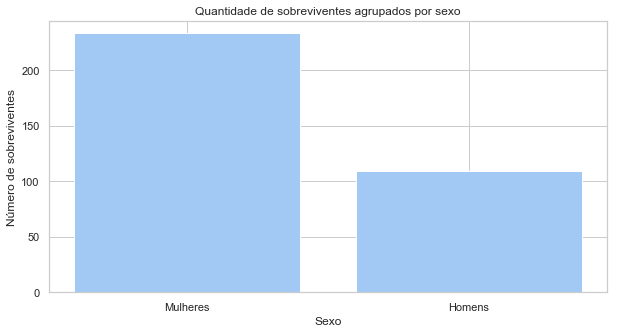

In [20]:
gerar_grafico_barras(labels=['Mulheres', 'Homens'],
                       dados=se_gender_survived,
                       titulo='Quantidade de sobreviventes agrupados por sexo',
                       yLabel='Número de sobreviventes', 
                       xLabel='Sexo')

 É notório no gráfico acima que sobreviveram mais mulheres do que homens, isto no leva a crer que a famosa frase "Mulheres e crianças primeiro" foi levada a sério na tragédia do Titanic

### Pessoas mais jovens foram as que mais sobreviveram?

Para responder a tal pergunta, foi separado os dados dos sobreviventes e não sobreviventes em dois Arrays, para que fosse possível gerar o histograma das informações.

In [21]:
ages_survived = np.array(df_survived['Age']) #Array com a informação da idade dos sobreviventes
ages_died = np.array(df_died['Age']) #Array com a informação da idade dos não sobreviventes

In [22]:
print("A média de idade dos que sobreviveram foi {}".format(ages_survived.mean().round()))

A média de idade dos que sobreviveram foi 28.0


In [23]:
print("A média de idade dos que não sobreviveram foi {}".format(ages_died.mean().round()))

A média de idade dos que não sobreviveram foi 30.0


Gerar histograma das informações

Text(0.5, 0, 'Idade')

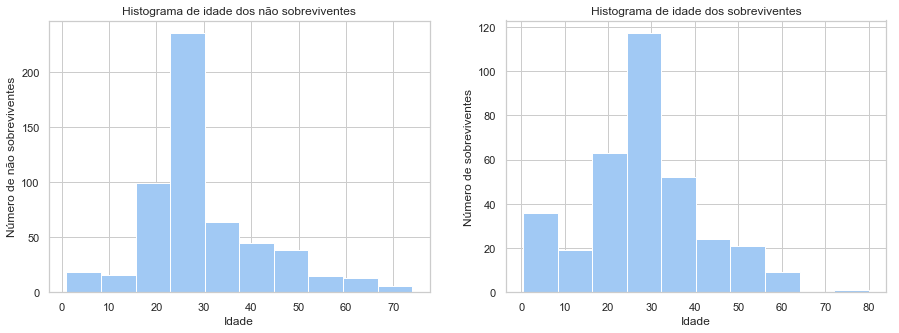

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.hist(ages_died)
ax1.set_title('Histograma de idade dos não sobreviventes')
ax1.set_ylabel('Número de não sobreviventes');
ax1.set_xlabel('Idade')

ax2.hist(ages_survived)
ax2.set_title('Histograma de idade dos sobreviventes')
ax2.set_ylabel('Número de sobreviventes');
ax2.set_xlabel('Idade')

Pelos gráficos é possível perceber que a maioria dos que conseguiram se salvar estavam na faixa dos 20~30 anos.

### Pessoas da 1ª Classe foram a maioria entre os sobreviventes?

Esta pergunta me surgiu pois me recordei de um momento do filme 'Titanic' onde muitos botes salva-vidas estavam saindo com poucas pessoas dentro, mesmo que houvesse espaço eles não permitiam outras pessoas se salvassem. 

Para analisar estes dados, foi criado uma Series agrupando o total de cada classe de Ticket

In [25]:
se_survived_class = pd.Series(df_survived['Pclass'].groupby(df_survived['Pclass']).count())

In [26]:
se_survived_class #visualização dos dados

Pclass
1    136
2     87
3    119
Name: Pclass, dtype: int64

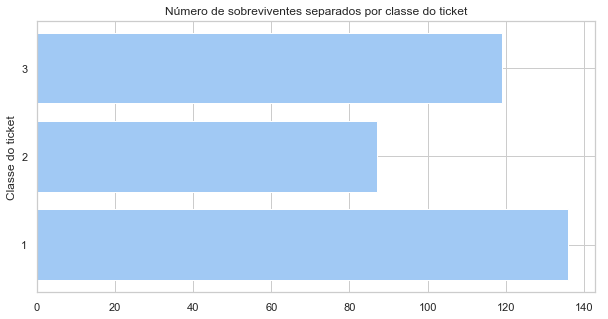

In [27]:
gerar_grafico_barras(dados=se_survived_class,
                       titulo='Número de sobreviventes separados por classe do ticket',
                       yLabel='Classe do ticket',
                       horizontal_orientation=True)

Pelo gráfico acima é possível perceber que pessoas que estavam na 1ª classe sobreviveram mais do que as outras classes.

### Pessoas sozinhas foram as que mais sobreviveram?

É de se acreditar que pessoas que estavam sozinhas se salvaram mais, pois não tinham que se preocupar com a segurança de seus entes queridos.

Primeiramente foi criado um conjunto de dados agrupando a quantidade de Pais/Mães e Filhos que acompanhavam o passageiro

In [28]:
parch_df_survived = pd.Series(df_survived['Parch'].groupby(df_survived['Parch']).count())

In [29]:
print(parch_df_survived)

Parch
0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64


Em seguida, foi criado um conjunto de dados agrupando a quantidade de Irmãos/Irmãs, Maridos/Esposas

In [30]:
sibsp_df_survived = pd.Series(df_survived['SibSp'].groupby(df_survived['SibSp']).count())

In [31]:
print(sibsp_df_survived)

SibSp
0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64


Com os dados devidamente filtrados, podemos verificar os resultados nos gráficos abaixo

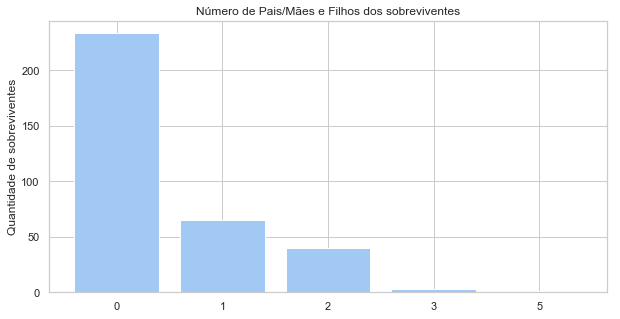

In [32]:
gerar_grafico_barras(dados=parch_df_survived,
                       titulo='Número de Pais/Mães e Filhos dos sobreviventes',
                       yLabel='Quantidade de sobreviventes')

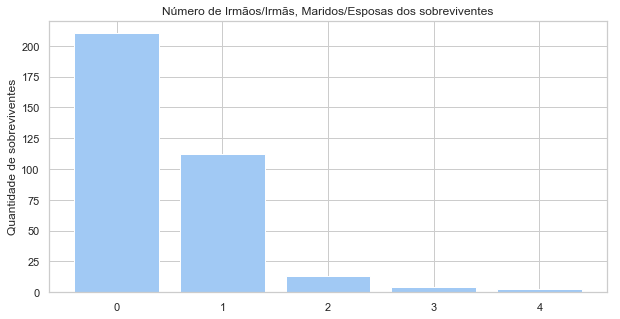

In [33]:
gerar_grafico_barras(dados=sibsp_df_survived,
                       titulo='Número de Irmãos/Irmãs, Maridos/Esposas dos sobreviventes',
                       yLabel='Quantidade de sobreviventes')

Analisando ambos os gráficos é notável que as pessoas que estavam sozinhas foram as que mais sobreviveram. Quanto maior o número de acompanhantes, menor é a taxa de sobrevivencia.

### Pessoas acompanhadas foram as que mais morreram?

A partir das informações anteriores fica a indagação, Será que as pessoas que estavam acompanhadas foram as que mais morreram? Isto seria um fator relevante para a sobrevivencia do passageiro ou não?

Para responder tal pergunta, separei novamente os dados em Series, agora utilizando as informações daqueles que não sobreviveram.

In [34]:
parch_df_died = pd.Series(df_died['Parch'].groupby(df_died['Parch']).count())

In [35]:
print(parch_df_died)

Parch
0    445
1     53
2     40
3      2
4      4
5      4
6      1
Name: Parch, dtype: int64


In [36]:
sibsp_df_died = pd.Series(df_died['SibSp'].groupby(df_died['SibSp']).count())

In [37]:
print(sibsp_df_died)

SibSp
0    398
1     97
2     15
3     12
4     15
5      5
8      7
Name: SibSp, dtype: int64


Com os dados devidamente filtrados, podemos prosseguir com a análise dos gráficos

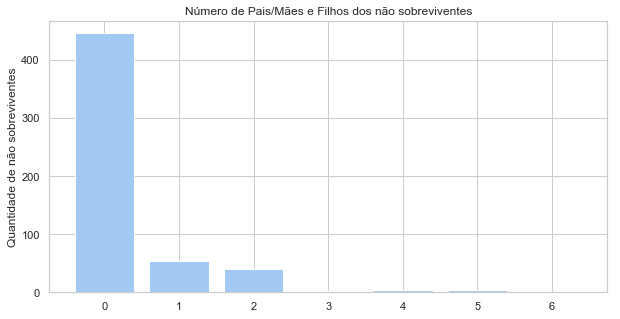

In [38]:
gerar_grafico_barras(dados=parch_df_died,
                       titulo='Número de Pais/Mães e Filhos dos não sobreviventes',
                       yLabel='Quantidade de não sobreviventes')

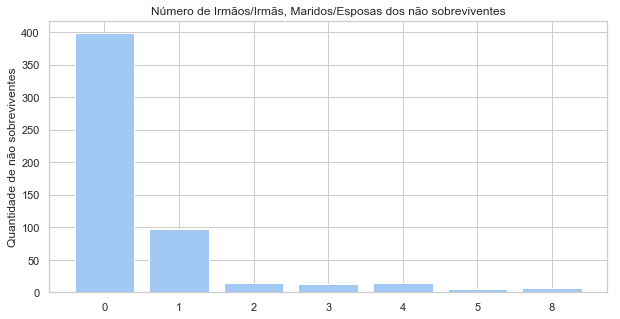

In [39]:
gerar_grafico_barras(dados=sibsp_df_died,
                       titulo='Número de Irmãos/Irmãs, Maridos/Esposas dos não sobreviventes',
                       yLabel='Quantidade de não sobreviventes')

É curioso notar que o mesmo efeito ocorre para as pessoas que não sobreviveram. A grande maioria não estava companhada dos pais ou filhos, ainda que inconclusivo, é possível dizer que estar acompanhado não foi um fator primordial para a morte dos passageiros.

# Conclusões
---

A partir da análise das informações anteriores e dos gráficos, foi possível notar que dentre os 891 passageiros que estavam nesta amostra de dados, 342 sobreviveram(cerca de 38%) e 549 não sobreviveram(cerca de 62%).

Dentre os sobreviventes, foi possível notar que as mulheres foram as que mais se salvaram, pois sobreviveram 233 mulheres e 109 homens.

Com relação a idade, a média de idade dos que sobreviveram foi de 28.0, enquanto a média de idade dos que não sobreviveram foi de 30.0. 
Esta media está possívelmente relacionada com o fato de que faltavam muitas informações sobre a idade dos passageiros, portanto, no processo de limpeza dos dados, foi adicionado a mediana de todo o dataframe, que seria 28.0.

Quanto à passageiros que estavam em classes melhores, foi possível constatar que passageiros da 1ª foram os que mais sobreviveram.

Analisando a quantidade de familiares e acompanhantes que os passageiros tinham no navio, foi possível notar que a maioria dos que sobreviveram, e que não sobreviveram, não estavam acompanhados de seus entes queridos.

## Limitações

Esta análise não indica nem sugere que uma alteração causa outra baseada unicamente em uma correlação. As conclusões aqui levantadas não são definitivas, existem limitações na análise deste projeto, pois o conjunto análisado contém apenas um fragmento do total de passageiros abordo do Titanic.

No inicio da análise, foi identificado que as colunas que possuem dados nulos são 'Age', 'Cabin' e 'Enbarked'. Diante disso, foi necessário tomar algumas ações para corrigir os dados:

* **Age**: A idade foi preenchida com a mediana de todo o conjunto de dados
* **Cabin**: A cabine foi preenchida com 'None'
* **Embarked**: Local de embarcação foi preenchida com 'None'

Após este ajuste, foi verificado que não existiam dados duplicados, portanto, nenhuma ação precisou ser realizada.

Em alguns momentos precisou-se agrupar os dados para que fosse possível realizar a análise dos gráficos